In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp '/content/drive/MyDrive/All Projects/Women Safety/chennai_data.xlsx' -d '/content/'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the data
data = pd.read_excel('chennai_data.xlsx')

# Display the first few rows
data.head()


,Unnamed: 0,Address,Lat,Long,Theft,Robbery,Assault,Harassment
0,0,"41 A, Fourth Main Road,Raja Annmalipuram, Chen...",13.0250,80.2575,42,32,10,3
1,1,"House No.242, Angappa Naicken Street, 3rd Floo...",13.0933,80.2842,46,17,7,1
2,2,"Shop No 18, Aarthi Chambers, 189, Anna Salai, ...",13.0715,80.2741,38,7,0,2
3,3,"D-70, 3rd Street, East Annanagar, Chennai-600102.",13.0728,80.2042,22,6,0,4
4,4,"House No.1/74(First Floor),Vivekanandhar Stree...",17.0544,80.5635,16,35,6,2


In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# If there are missing values, fill them with the median of the column
if missing_values.sum() > 0:
    data.fillna(data.median(), inplace=True)


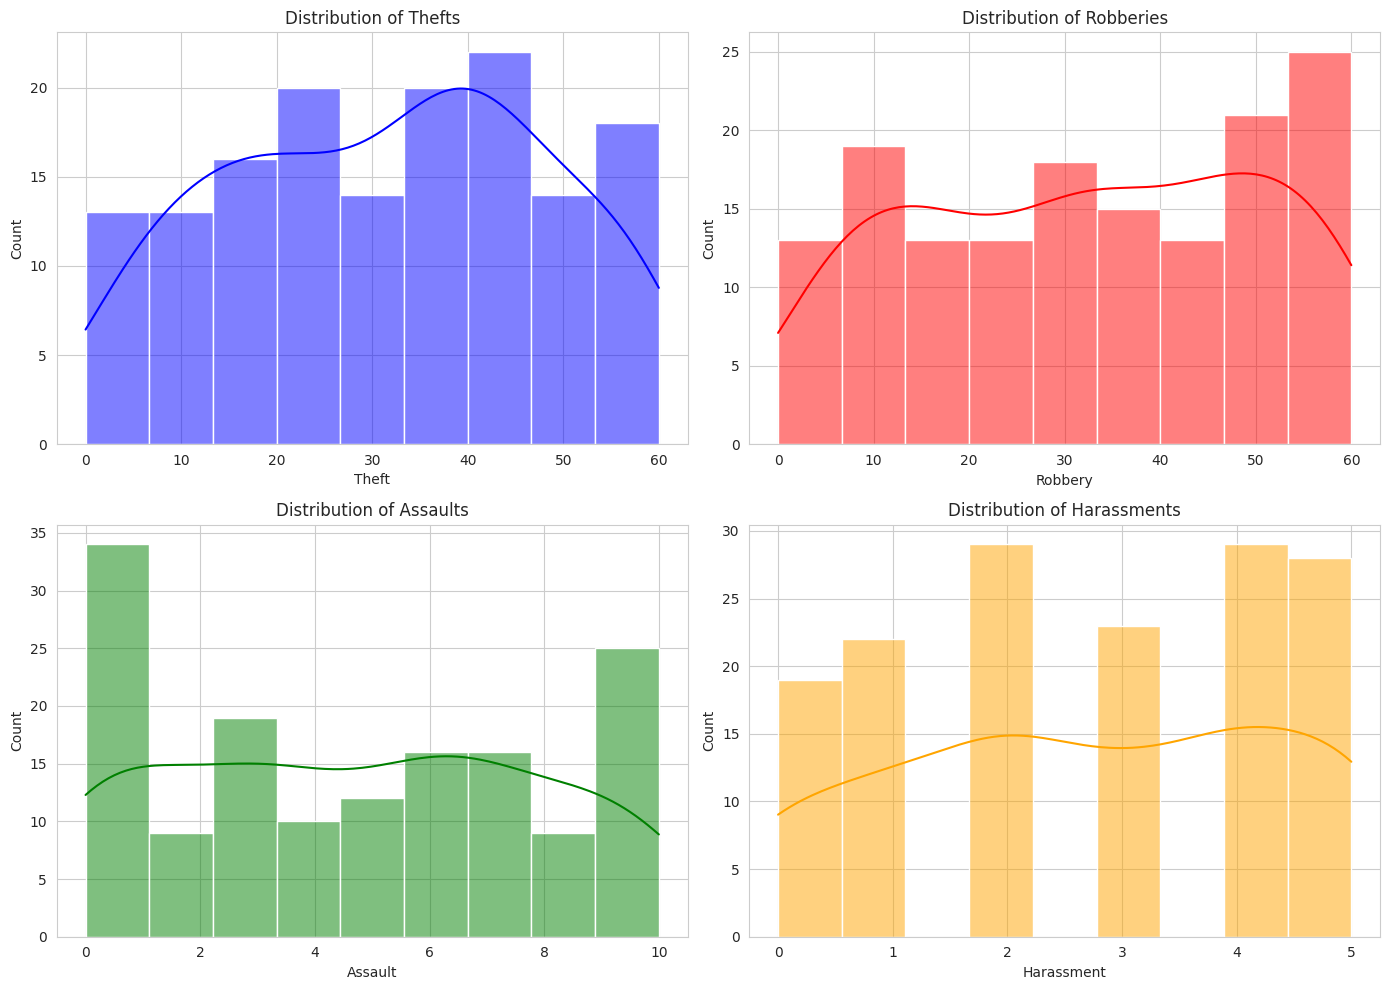

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')

# Plotting the distribution of each crime type
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.histplot(data=data, x='Theft', kde=True, ax=axes[0, 0], color='blue').set_title('Distribution of Thefts')
sns.histplot(data=data, x='Robbery', kde=True, ax=axes[0, 1], color='red').set_title('Distribution of Robberies')
sns.histplot(data=data, x='Assault', kde=True, ax=axes[1, 0], color='green').set_title('Distribution of Assaults')
sns.histplot(data=data, x='Harassment', kde=True, ax=axes[1, 1], color='orange').set_title('Distribution of Harassments')

plt.tight_layout()
plt.show()


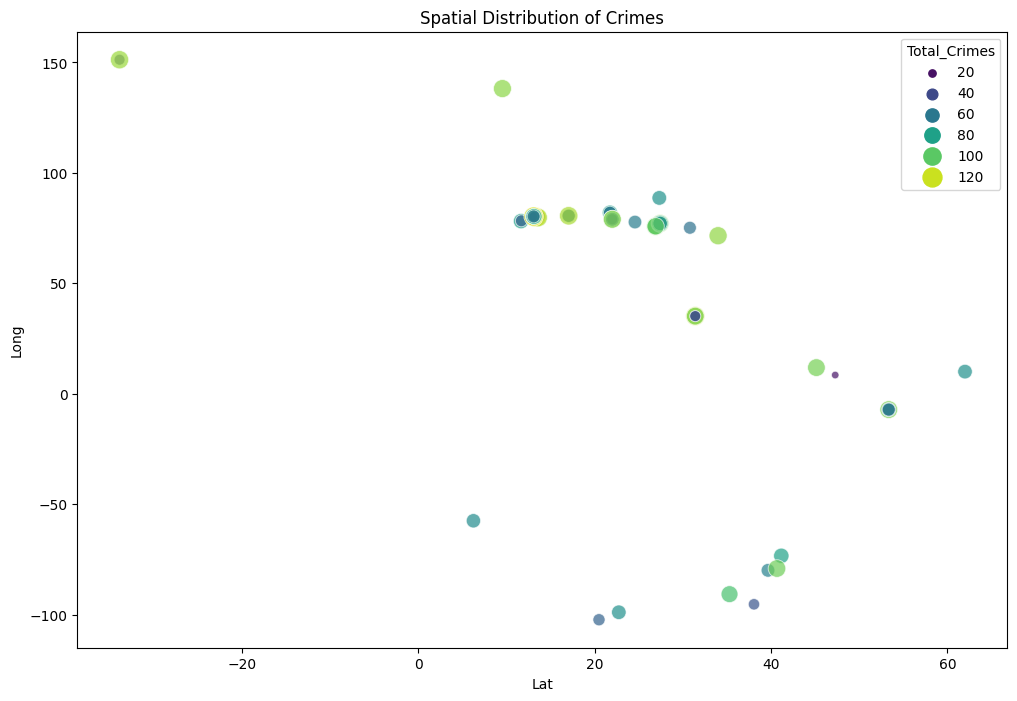

In [8]:
# Create a total crimes column
data['Total_Crimes'] = data['Theft'] + data['Robbery'] + data['Assault'] + data['Harassment']

# Scatter plot of latitude and longitude colored by total crimes
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Lat', y='Long', hue='Total_Crimes', palette='viridis', size='Total_Crimes', sizes=(20,200), alpha=0.7)
plt.title('Spatial Distribution of Crimes')
plt.show()


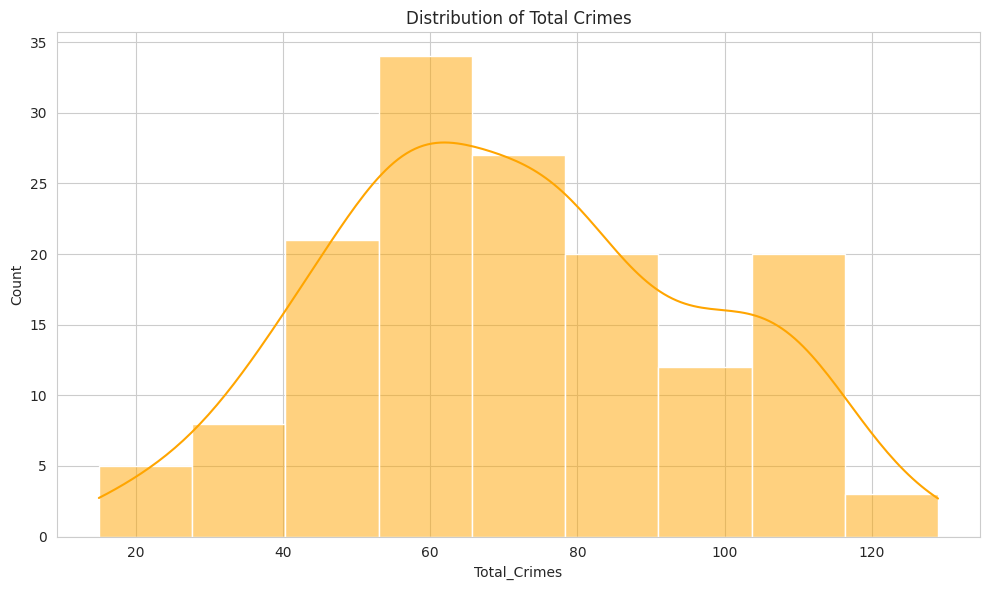

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')

# Plotting the distribution of each crime type
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.histplot(data=data, x='Total_Crimes', kde=True, ax=axes, color='orange').set_title('Distribution of Total Crimes')

plt.tight_layout()
plt.show()
